In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from lofo import LOFOImportance, FLOFOImportance, Dataset, plot_importance

/home/aerdem/projects/lofo-importance/lofo/lofo_importance.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
from data.test_data import generate_test_data, generate_unstructured_test_data

df = generate_test_data(1000)
df.head()

,A,B,C,D,target,binary_target
0,0.548814,0.592880,0.811518,0.413962,1.471477,1
1,0.715189,0.010064,0.476084,0.629618,0.583727,0
2,0.602763,0.475826,0.523156,0.778584,1.448437,1
3,0.544883,0.708770,0.250521,0.851558,1.951483,1
4,0.423655,0.043975,0.605043,0.816413,0.444471,0


In [3]:
lr = LinearRegression()
lr.fit(df[["A", "B", "C", "D"]], df["target"])

fi = FLOFOImportance(lr, df, ["A", "B", "C", "D"], 'target', scoring="neg_mean_absolute_error")

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3,val_imp_4,val_imp_5,val_imp_6,val_imp_7,val_imp_8,val_imp_9
1,B,0.540447,0.017032,0.533597,0.542953,0.515082,0.523174,0.519980,0.540920,0.553128,0.569075,0.562686,0.543878
3,D,0.091187,0.003451,0.090512,0.086745,0.089700,0.086895,0.087204,0.093852,0.093959,0.096936,0.095004,0.091061
0,A,0.087466,0.001888,0.089402,0.086949,0.086202,0.090207,0.085031,0.088689,0.086279,0.087283,0.089915,0.084702
2,C,0.000095,0.000055,0.000144,0.000138,0.000181,0.000021,0.000077,0.000055,0.000147,0.000002,0.000098,0.000089


In [4]:
from sklearn.metrics import make_scorer, mean_absolute_error

scorer = make_scorer(mean_absolute_error, greater_is_better=False)
cv = KFold(n_splits=4, shuffle=True, random_state=0)

dataset = Dataset(df=df, target="target", features=["A", "B", "C", "D"])
fi = LOFOImportance(dataset, scoring=scorer, model=LinearRegression(), cv=cv)

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
1,B,0.445256,0.026244,0.424979,0.418390,0.452846,0.484809
3,D,0.053289,0.006535,0.050304,0.063162,0.045333,0.054358
0,A,0.050934,0.004749,0.045731,0.048411,0.051128,0.058467
2,C,0.000049,0.000028,0.000083,0.000070,0.000028,0.000015


In [5]:
rf = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)

dataset = Dataset(df=df, target="binary_target", features=["A", "B", "C", "D"])
fi = LOFOImportance(dataset, scoring='accuracy', model=rf, cv=cv)

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
1,B,0.421,0.015588,0.420,0.420,0.444,0.400
0,A,0.043,0.019875,0.056,0.012,0.064,0.040
3,D,0.038,0.007211,0.048,0.036,0.040,0.028
2,C,0.006,0.009165,0.020,0.008,0.000,-0.004


In [6]:
df = generate_unstructured_test_data(10000)

dataset = Dataset(df=df, target="binary_target", features=["A", "B", "C", "D"])
fi = LOFOImportance(dataset, 'roc_auc')

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
1,B,0.190080,0.004669,0.191205,0.185076,0.186855,0.197185
0,A,0.004766,0.004523,0.003013,0.000024,0.012207,0.003820
3,D,0.003300,0.001643,0.003527,0.003856,0.000658,0.005160
2,C,0.000616,0.006351,0.008082,0.005725,-0.006130,-0.005215


In [7]:
dataset = Dataset(df=df, target="target", features=["A", "B", "C", "D", "E"])
fi = LOFOImportance(dataset, scorer, n_jobs=-1)

importances = fi.get_importance()
importances

,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
4,E,0.543890,0.002727,0.544677,0.540228,0.542920,0.547735
1,B,0.298485,0.006152,0.294240,0.293408,0.297484,0.308809
3,D,0.047357,0.001626,0.045262,0.046700,0.049725,0.047739
0,A,0.038360,0.000741,0.037887,0.037394,0.039035,0.039125
2,C,-0.000361,0.000450,0.000144,-0.000451,-0.000089,-0.001048


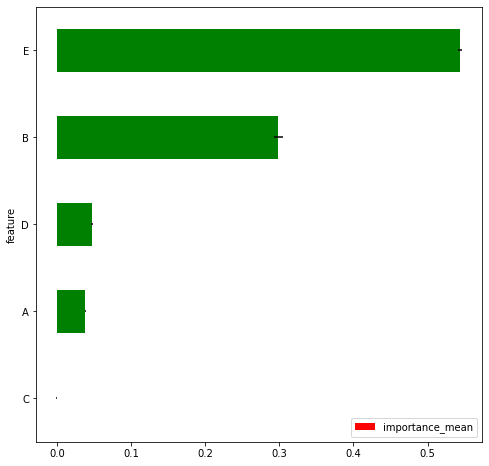

In [8]:
%matplotlib inline
plot_importance(importances)

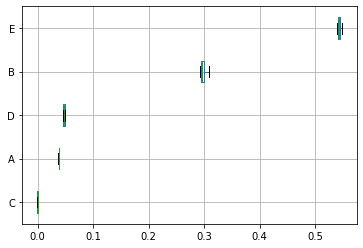

In [9]:
plot_importance(importances, kind="box")

In [10]:
from sklearn.feature_extraction.text import CountVectorizer
from lightgbm import LGBMClassifier

df = generate_test_data(1000, text=True)
features = ["A", "B", "C", "D"]

cv = CountVectorizer(ngram_range=(3, 3), analyzer="char")
feature_groups = dict()
feature_groups["names"] = cv.fit_transform(df["T"])
feature_groups["interactions"] = df[["A", "B"]].values*df[["C", "D"]].values

dataset = Dataset(df=df, target="binary_target", features=features, feature_groups=feature_groups)

lgbm = LGBMClassifier(random_state=0, n_jobs=1)

lofo = LOFOImportance(dataset, model=lgbm, cv=4, scoring='roc_auc', n_jobs=4)

importances = lofo.get_importance()
importances

/home/aerdem/projects/lofo-importance/lofo/lofo_importance.py:45: UserWarning: Warning: If your model is multithreaded, please initialise the numberof jobs of LOFO to be equal to 1, otherwise you may experience performance issues.
  warnings.warn(warning_str)


,feature,importance_mean,importance_std,val_imp_0,val_imp_1,val_imp_2,val_imp_3
5,names,0.220283,0.011425,2.065105e-01,0.237738,0.221682,2.152011e-01
1,B,0.005008,0.002075,6.186478e-03,0.007807,0.003241,2.798645e-03
2,A,0.000773,0.000514,1.031080e-03,0.001473,0.000442,1.472971e-04
0,D,0.000074,0.000368,1.472971e-04,-0.000442,0.000589,0.000000e+00
3,C,-0.000110,0.000482,1.110223e-16,-0.000884,0.000442,1.110223e-16
4,interactions,-0.000147,0.000751,1.472971e-04,-0.001326,0.000736,-1.472971e-04
